# Importando Dados

In [1]:
import pandas as pd
import numpy as np
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [2]:
print(test.shape)
test.head()

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
print(train.shape)
train.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Inicio da analise de dados

In [4]:
live = train.query("Survived == 1")
die = train.query("Survived == 0")


### PClass OK

<AxesSubplot:ylabel='Frequency'>

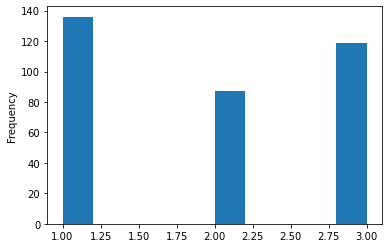

In [5]:
live.Pclass.plot(kind="hist")

### Cabin_Binario 

In [6]:
def change_Cabin(valor):
    if valor == True:
        return 1
    else:
        return 0
Cabin_new = train['Cabin'].isnull()    
train['Cabine_Binario'] = Cabin_new.map(change_Cabin)  

In [24]:
Cabin_new2 = test['Cabin'].isnull()    
test['Cabine_Binario'] = Cabin_new.map(change_Cabin)  

### Embarked

In [7]:
def change_sex(valor):
    if valor == 'S':
        return 2
    else:
        if valor == "C":
            return 1
        else:
            return 0
train['Embarked_binario'] = train['Embarked'].map(change_sex)

def change_sex(valor):
    if valor == 'S':
        return 2
    else:
        if valor == "C":
            return 1
        else:
            return 0
test['Embarked_binario'] = test['Embarked'].map(change_sex)

live = train.query("Survived == 1")
die = train.query("Survived == 0")


<AxesSubplot:ylabel='Frequency'>

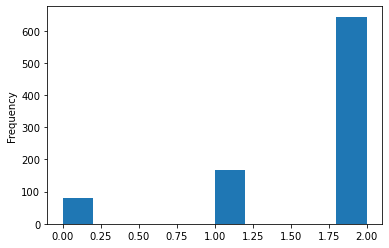

In [8]:
train.Embarked_binario.plot(kind="hist")

### Sex OK

In [9]:
def change_port(valor):
    if valor == 'female':
        return 1
    else:
        return 0
train['Sex_binario'] = train['Sex'].map(change_sex)

def change_port(valor):
    if valor == 'female':
        return 1
    else:
        return 0
test['Sex_binario'] = test['Sex'].map(change_sex)

live = train.query("Survived == 1")
die = train.query("Survived == 0")


### Age

In [10]:
train['Age'].fillna(train['Age'].mean(), inplace =True)
train['Age'] = train['Age'].map(lambda x: int(x))

test['Age'].fillna(test['Age'].mean(), inplace =True)
test['Age'] = test['Age'].map(lambda x: int(x))


<AxesSubplot:ylabel='Frequency'>

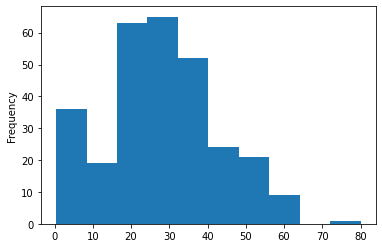

In [11]:
live.Age.plot(kind="hist")

### SibSP

<AxesSubplot:ylabel='Frequency'>

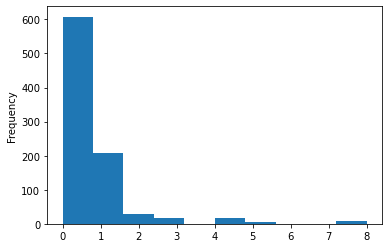

In [12]:
train.SibSp.plot(kind="hist")

### Parch

<AxesSubplot:ylabel='Frequency'>

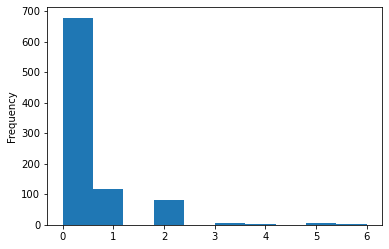

In [13]:
train.Parch.plot(kind="hist")

### PassengerId

(<AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>)

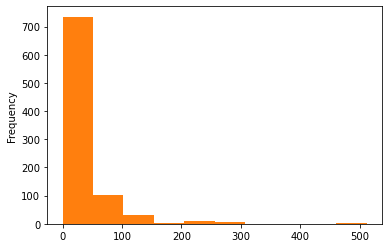

In [14]:
train['Fare'].fillna(train['Fare'].mean(), inplace =True)
train['Fare'] = train['Fare'].map(lambda x: int(x))
test['Fare'].fillna(test['Fare'].mean(), inplace =True)
test['Fare'] = test['Fare'].map(lambda x: int(x))
live.Fare.plot(kind="hist") , train.Fare.plot(kind="hist")


### Name 

In [15]:
def Change_name_man(valor):
    if "Master." in valor:
        return 1
    else:
        if "Mr." in valor:
            return 0 
        else:
            return 2
train['Name_man'] = train['Name'].map(Change_name_man)        

In [16]:
def Change_name_woman(valor):
    if "Miss." in valor:
        return 1
    else:
        if "Mrs." in valor:
            return 0 
        else:
            return 2
train['Name_woman'] = train['Name'].map(Change_name_woman)   

In [17]:
test['Name_man'] = test['Name'].map(Change_name_man)        
test['Name_woman'] = test['Name'].map(Change_name_woman)   

## Primeiro Teste

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import random

x = train[['Pclass','Age','SibSp', 'Parch', 'Fare', 'Sex_binario', 'Embarked_binario']]
x = train[['Pclass','Age', 'Sex_binario']]
y = train['Survived']
dados_previsoes = train[['Pclass','Age','SibSp', 'Parch', 'Fare', 'Sex_binario', 'Embarked_binario']]


modelo = DecisionTreeClassifier(max_depth=10)
modelo.fit(x, y)
previsoes = modelo.predict(dados_previsoes)


ValueError: X has 7 features, but DecisionTreeClassifier is expecting 3 features as input.

## Segundo teste (randon Forest)

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import random
from sklearn.model_selection import RepeatedKFold

x = train[['Pclass','Age','SibSp', 'Parch', 'Fare', 'Sex_binario', 'Embarked_binario','Cabine_Binario','Name_man','Name_woman']]
y = train['Survived']

kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=1)
resultados =[]
for linhas_treino, linhas_valid in kf.split(x):
    #print('Treino:', linhas_treino.shape[0])
    #print('Valid:', linhas_valid.shape[0])
    
    treino_x, teste_x = x.iloc[linhas_treino], x.iloc[linhas_valid]
    treino_y, teste_y = y.iloc[linhas_treino], y.iloc[linhas_valid]
    
    modelo = RandomForestClassifier(n_estimators = 100, random_state = 0, min_samples_leaf=5, n_jobs=-1)
    modelo.fit(treino_x, treino_y)
    previsoes = modelo.predict(teste_x)

    acuracia = accuracy_score(teste_y, previsoes.round())*100
    resultados.append(acuracia)
    print("A acurácia foi %.2f%%" % acuracia)
    
    # print(treino_x.head())
print('media de resutados é', np.mean(resultados))   

A acurácia foi 78.92%
A acurácia foi 83.82%
A acurácia foi 80.27%
A acurácia foi 82.92%
A acurácia foi 81.17%
A acurácia foi 81.12%
A acurácia foi 82.29%
A acurácia foi 80.90%
A acurácia foi 81.39%
A acurácia foi 82.92%
A acurácia foi 80.94%
A acurácia foi 82.02%
A acurácia foi 83.18%
A acurácia foi 80.45%
A acurácia foi 84.98%
A acurácia foi 80.00%
A acurácia foi 81.84%
A acurácia foi 81.57%
A acurácia foi 80.72%
A acurácia foi 80.22%
media de resutados é 81.58250617221746


In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import random
from sklearn.model_selection import RepeatedKFold

x = train[['Pclass','Age','SibSp', 'Parch', 'Fare', 'Sex_binario', 'Embarked_binario','Cabine_Binario','Name_man','Name_woman']]
y = train['Survived']

kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=1)
for linhas_treino, linhas_valid in kf.split(x):
    
    modelo = RandomForestClassifier(n_estimators = 100, random_state = 0, min_samples_leaf=5, n_jobs=-1)
    modelo.fit(x, y)
    previsoes = modelo.predict(test[['Pclass','Age','SibSp', 'Parch', 'Fare', 'Sex_binario', 'Embarked_binario','Cabine_Binario','Name_man','Name_woman']])

In [26]:
sub = pd.Series(previsoes, index = test['PassengerId'], name = 'Survived')

In [27]:
sub.shape

(418,)

In [28]:
sub.to_csv("segundo_modelo.csv", header = True)

In [23]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_binario,Sex_binario,Name_man,Name_woman
0,892,3,"Kelly, Mr. James",male,34,0,0,330911,7,NaN,Q,0,0,0,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7,NaN,S,2,0,2,0
2,894,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9,NaN,Q,0,0,0,2
3,895,3,"Wirz, Mr. Albert",male,27,0,0,315154,8,NaN,S,2,0,0,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12,NaN,S,2,0,2,0
